<a href="https://colab.research.google.com/github/rohan-sharma84/AIMLCapstone/blob/main/Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [117]:
project_path = r'/content/drive/MyDrive/CapstoneProject/Data/'

In [118]:
import pandas as pd
import numpy as np
import csv
DATASET_FOLDER_TRAIN = project_path +"car_data/car_data/train/"
DATASET_FOLDER_TEST = "car_data/car_data/test/"
TRAIN_CSV = project_path + "anno_train.csv"
TEST_CSV = project_path + "anno_test.csv"
DATA_LABELS = np.array(pd.read_csv(project_path+'names.csv',\
                                   header = None))

In [119]:
import numpy as np
import csv

with open(TRAIN_CSV, "r") as f:
  
  y_train = np.zeros((sum(1 for line in f), 5))
  X_train = []
  f.seek(0)
  data = csv.reader(f, delimiter=',')
  for index, row in enumerate(data):
    for i, r in enumerate(row[1:7]):
      row[i+1] = int(r)
    path, x0, y0, x1, y1, car_ref = row       # Read image, its dimensions, BBox coords
    path = DATASET_FOLDER_TRAIN + DATA_LABELS[car_ref-1][0] + '/'+path
    #y_train[index, 0] = x0 * IMAGE_SIZE / image_width                 # Normalize bounding box by image size
    #y_train[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image size
    #y_train[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          # Normalize bounding box by image size
    #y_train[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height         # Normalize bounding box by image size
    y_train[index, 0] = x0               # Normalize bounding box by image size
    y_train[index, 1] = y0              # Normalize bounding box by image size
    y_train[index, 2] = (x1 - x0)          # Normalize bounding box by image size
    y_train[index, 3] = (y1 - y0)       # Normalize bounding box by image size
    y_train[index, 4] = int(car_ref)
    X_train.append(path)                 

In [120]:
X_train[:5]

['/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura TL Sedan 2012/00002.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Dodge Dakota Club Cab 2007/00003.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Hyundai Sonata Hybrid Sedan 2012/00004.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Ford F-450 Super Duty Crew Cab 2012/00005.jpg']

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Cadillac CTS-V Sedan 2012/00098.jpg


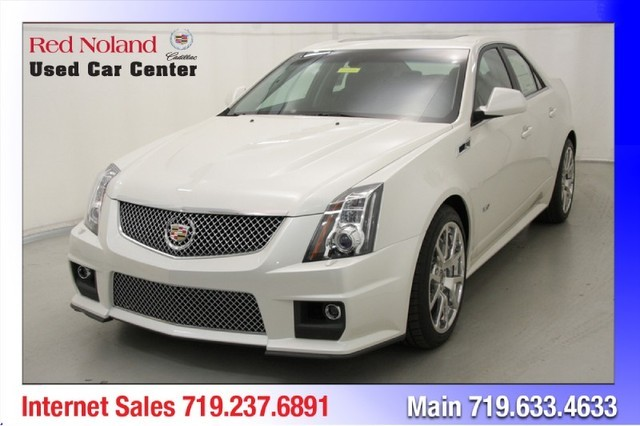

In [121]:
import cv2
from google.colab.patches import cv2_imshow
# Pick a random image to check how it looks
filename = X_train[97]
print(filename)
unscaled = cv2.imread(filename)

cv2_imshow(unscaled) 

region = y_train[97]
x0 = region[0]
y0 = region[1]

x1 = (region[0] + region[2])
y1 = (region[1] + region[3])

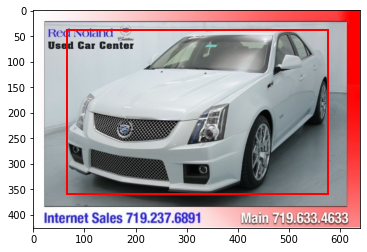

In [122]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Dodge Dakota Club Cab 2007/00003.jpg


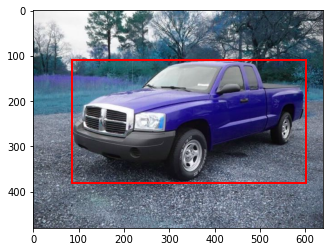

In [123]:
# Pick a random image to check how it looks
filename = X_train[2]
print(filename)
unscaled = cv2.imread(filename)

region = y_train[2]
x0 = region[0]
y0 = region[1]

x1 = (region[0] + region[2])
y1 = (region[1] + region[3])

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Audi RS 4 Convertible 2008/00201.jpg


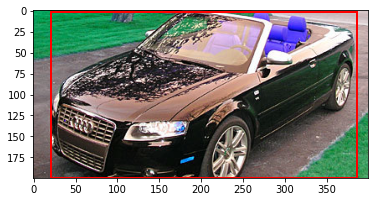

In [124]:
# Pick a random image to check how it looks
filename = X_train[200]
print(filename)
unscaled = cv2.imread(filename)
region = y_train[200]
x0 = region[0]
y0 = region[1]

x1 = (region[0] + region[2])
y1 = (region[1] + region[3])

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [125]:
print(X_train[2])

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Dodge Dakota Club Cab 2007/00003.jpg


In [126]:
print(y_train[2])
print(DATA_LABELS[int(y_train[2][4])-1][0])

[ 85. 109. 516. 272.  91.]
Dodge Dakota Club Cab 2007


Exploratory Data Analysis - Train Data


In [127]:
df_train=pd.read_csv(TRAIN_CSV, header=None)

df_train.columns =['Image', 'x0', 'y0', 'x1', 'y1','Car_ref'] 
df_test=pd.read_csv(TEST_CSV, header=None)
df_test.columns =['Image', 'x0', 'y0', 'x1', 'y1','Car_ref'] 

In [128]:
df_train.shape

(8144, 6)

In [129]:
df_test.shape


(8041, 6)

In [130]:
df_train.head()


,Image,x0,y0,x1,y1,Car_ref
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8144 non-null   object
 1   x0       8144 non-null   int64 
 2   y0       8144 non-null   int64 
 3   x1       8144 non-null   int64 
 4   y1       8144 non-null   int64 
 5   Car_ref  8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [132]:
## Some names contain '/' like 155 record in train data as the file location has - instead of /
## We will have to replace this with '-' since the folder location in data has '-'
# adding car name to train
df_train["Car_name"] = ''
df_test["Car_name"] = ''
i=0
for ref in df_train["Car_ref"]:
  ref=DATA_LABELS[ref-1][0]
  df_train["Car_name"][i] = ref.replace("/" ,"-")## We will have to replace this with '-' since the folder location in data has '-'
  i=i+1
# adding car name to test
i=0
for ref in df_test["Car_ref"]:
  ref=DATA_LABELS[ref-1][0]
  df_test["Car_name"][i] = ref.replace("/" ,"-")## We will have to replace this with '-' since the folder location in data has '-'
  i=i+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [133]:
df_train.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [134]:
df_test.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007
1,00002.jpg,100,19,576,203,103,Ferrari 458 Italia Convertible 2012
2,00003.jpg,51,105,968,659,145,Jeep Patriot SUV 2012
3,00004.jpg,67,84,581,407,187,Toyota Camry Sedan 2012
4,00005.jpg,140,151,593,339,185,Tesla Model S Sedan 2012


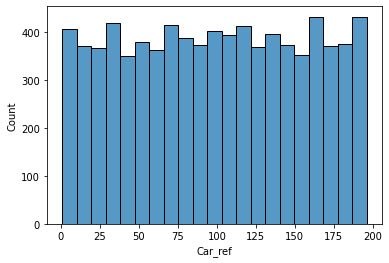

In [135]:
#train data split
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.histplot(df_train['Car_ref'])
print()

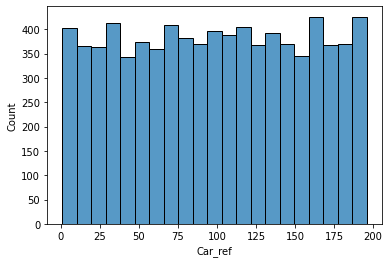

In [136]:
#test data split
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.histplot(df_test['Car_ref'])
print()

In [137]:
df_train.Car_name.value_counts()

GMC Savana Van 2012                                    68
Chrysler 300 SRT-8 2010                                49
Mitsubishi Lancer Sedan 2012                           48
Mercedes-Benz 300-Class Convertible 1993               48
Jaguar XK XKR 2012                                     47
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    31
Chevrolet Express Cargo Van 2007                       30
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   28
Hyundai Accent Sedan 2012                              24
Name: Car_name, Length: 196, dtype: int64

In [138]:
df_test.Car_name.value_counts()

GMC Savana Van 2012                                    68
Mercedes-Benz 300-Class Convertible 1993               48
Chrysler 300 SRT-8 2010                                48
Mitsubishi Lancer Sedan 2012                           47
Nissan 240SX Coupe 1998                                46
                                                       ..
Rolls-Royce Phantom Drophead Coupe Convertible 2012    30
Chevrolet Express Cargo Van 2007                       29
Maybach Landaulet Convertible 2012                     29
FIAT 500 Abarth 2012                                   27
Hyundai Accent Sedan 2012                              24
Name: Car_name, Length: 196, dtype: int64

In [139]:
# Adding file location to the Train df
df_train['File_loc']='/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/'+df_train['Car_name']+'/'+df_train['Image']
df_train.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...


In [140]:
# Adding file location to the test df
df_test['File_loc']='/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/'+df_test['Car_name']+'/'+df_test['Image']
df_test.head()


,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...
1,00002.jpg,100,19,576,203,103,Ferrari 458 Italia Convertible 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
2,00003.jpg,51,105,968,659,145,Jeep Patriot SUV 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
3,00004.jpg,67,84,581,407,187,Toyota Camry Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...
4,00005.jpg,140,151,593,339,185,Tesla Model S Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...


In [141]:
# Adding Car_type and Year to the train and test data set
# train
df_train["Car_type"] = ''
df_train["Year"] = ''
i=0
for ref in df_train["Car_name"]:
  words = ref.split()
  df_train["Car_type"][i] = words[-2]
  df_train["Year"][i] = words[-1]
  i=i+1
# test
df_test["Car_type"] = ''
df_test["Year"] = ''
i=0
for ref in df_test["Car_name"]:
  words = ref.split()
  df_test["Car_type"][i] = words[-2]
  df_test["Year"][i] = words[-1]
  i=i+1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWa

In [142]:
df_train.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc,Car_type,Year
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Coupe,2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...,Cab,2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Cab,2012


In [143]:
df_test.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc,Car_type,Year
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2007
1,00002.jpg,100,19,576,203,103,Ferrari 458 Italia Convertible 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Convertible,2012
2,00003.jpg,51,105,968,659,145,Jeep Patriot SUV 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,SUV,2012
3,00004.jpg,67,84,581,407,187,Toyota Camry Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
4,00005.jpg,140,151,593,339,185,Tesla Model S Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012


In [144]:
"""# Adding height and width to the train data set
df_train["Height"] = ''
df_train["Width"] = ''
i=0
for ref in df_train["File_loc"]:
  image = cv2.imread(ref)
  df_train["Height"][i] = image.shape[0]
  df_train["Width"][i] = image.shape[1]
  i=i+1"""

'# Adding height and width to the train data set\ndf_train["Height"] = \'\'\ndf_train["Width"] = \'\'\ni=0\nfor ref in df_train["File_loc"]:\n  image = cv2.imread(ref)\n  df_train["Height"][i] = image.shape[0]\n  df_train["Width"][i] = image.shape[1]\n  i=i+1'

In [145]:
"""# Adding height and width to the test data set
df_test["Height"] = ''
df_test["Width"] = ''
i=0
for ref in df_test["File_loc"]:
  image = cv2.imread(ref)
  df_test["Height"][i] = image.shape[0]
  df_test["Width"][i] = image.shape[1]
  i=i+1"""

'# Adding height and width to the test data set\ndf_test["Height"] = \'\'\ndf_test["Width"] = \'\'\ni=0\nfor ref in df_test["File_loc"]:\n  image = cv2.imread(ref)\n  df_test["Height"][i] = image.shape[0]\n  df_test["Width"][i] = image.shape[1]\n  i=i+1'

In [146]:
"""# saving the dataframe 
df_train.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_train.csv') """

"# saving the dataframe \ndf_train.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_train.csv') "

In [147]:
"""# saving the dataframe 
df_test.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_test.csv') """

"# saving the dataframe \ndf_test.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_test.csv') "

In [148]:
df_train.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_train.csv')

In [149]:
df_test.to_csv('/content/drive/MyDrive/CapstoneProject/Data/df_train.csv')

In [150]:
df_train.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc,Car_type,Year
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Coupe,2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...,Cab,2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Cab,2012


In [151]:
df_test.head()

,Image,x0,y0,x1,y1,Car_ref,Car_name,File_loc,Car_type,Year
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2007
1,00002.jpg,100,19,576,203,103,Ferrari 458 Italia Convertible 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Convertible,2012
2,00003.jpg,51,105,968,659,145,Jeep Patriot SUV 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,SUV,2012
3,00004.jpg,67,84,581,407,187,Toyota Camry Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012
4,00005.jpg,140,151,593,339,185,Tesla Model S Sedan 2012,/content/drive/MyDrive/CapstoneProject/Data/ca...,Sedan,2012


In [152]:
Car_brand_train=df_train['Car_name']
Car_brand_test=df_test['Car_name']

In [153]:
# Extracting car brand
i=0
for ref in Car_brand_train:
  words = ref.split()
  Car_brand_train[i] = words[0]
  i=i+1
# test
i=0
for ref in Car_brand_test:
  words = ref.split()
  Car_brand_test[i] = words[0]
  i=i+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


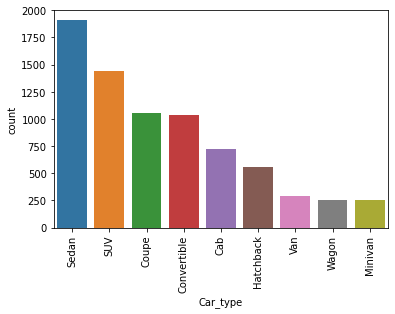

In [154]:
#train data top 9 count cartype 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(df_train['Car_type'],order =df_train['Car_type'].value_counts().iloc[:9].index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


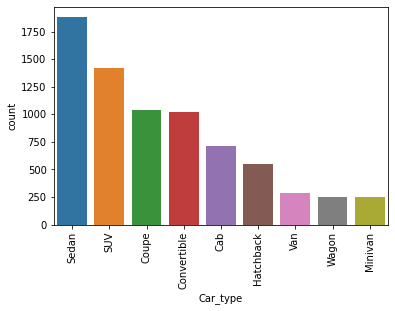

In [155]:
#test data count cartype
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(df_test['Car_type'],order =df_test['Car_type'].value_counts().iloc[:9].index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


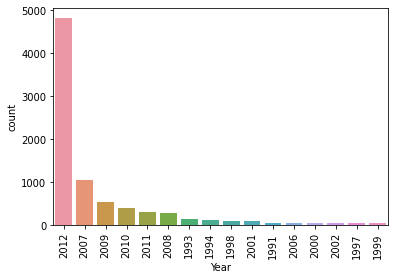

In [156]:
#train data count year wise
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(df_train['Year'],order =df_train['Year'].value_counts().index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


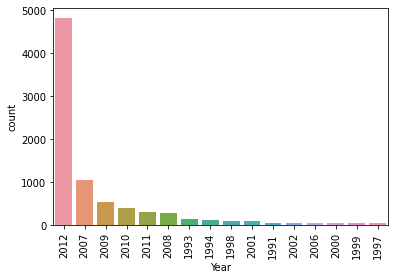

In [157]:
#test data count cartype
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(df_train['Year'],order =df_test['Year'].value_counts().index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


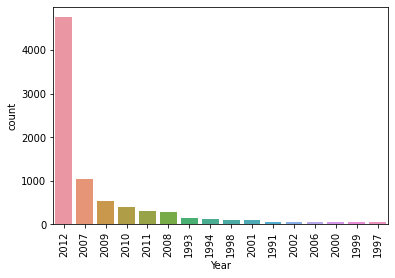

In [158]:
#test data count cartype
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(df_test['Year'],order =df_test['Year'].value_counts().index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


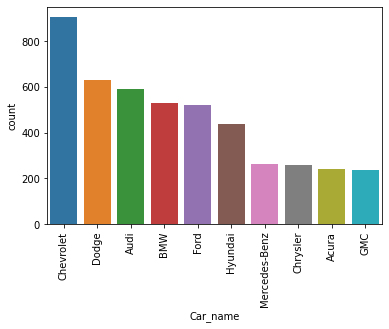

In [159]:
#Train data top 10 Car Brand
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(Car_brand_train,order =Car_brand_train.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


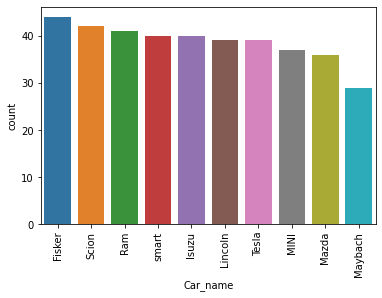

In [160]:
#Train data last 10 Car Brand
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(Car_brand_train,order =Car_brand_train.value_counts().iloc[-10:].index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


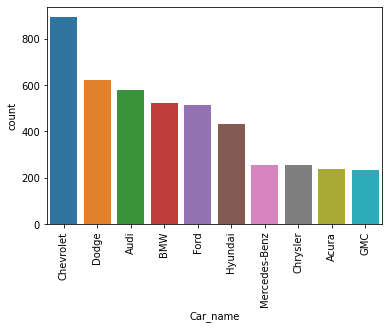

In [161]:
#Test data top 10 Car Brand
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(Car_brand_test,order =Car_brand_test.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
print()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


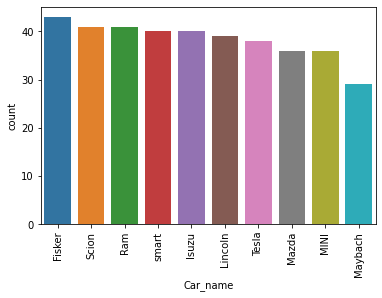

In [162]:
#Test data last 10 Car Brand
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.countplot(Car_brand_test,order =Car_brand_test.value_counts().iloc[-10:].index)
plt.xticks(rotation=90)
print()